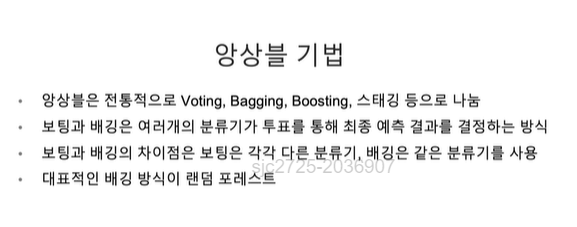

# Boosting 
- 여러개의 약한 분류기(성능이 떨어지는)가 순차적으로 학습을 하면서, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해 다음 분류기가 가중치를 인가해서 학습을 이어 진행하는 방식
- 예측성능이 뛰어남 
- 그래디언트 부스트, XGBoost, LightGBM 등이 있음

#### 배깅과 부스팅의 차이
- 배깅은 한번에 병렬적으로 결과를 얻음
- 부스팅은 순차적으로 진행됨

---

와인데이터 실습

In [1]:
import pandas as pd 
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url,sep=',',index_col=0)
wine['taste'] = [1 if quality >5 else 0 for quality in wine['quality']]

X = wine.drop(['taste','quality'],axis=1)
Y = wine.taste

StandardScaler

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [3]:
#데이터 나누기
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_sc,Y,test_size=0.2,random_state=13)


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'color'}>,
        <Axes: title={'center': 'taste'}>, <Axes: >, <Axes: >]],
      dtype=object)

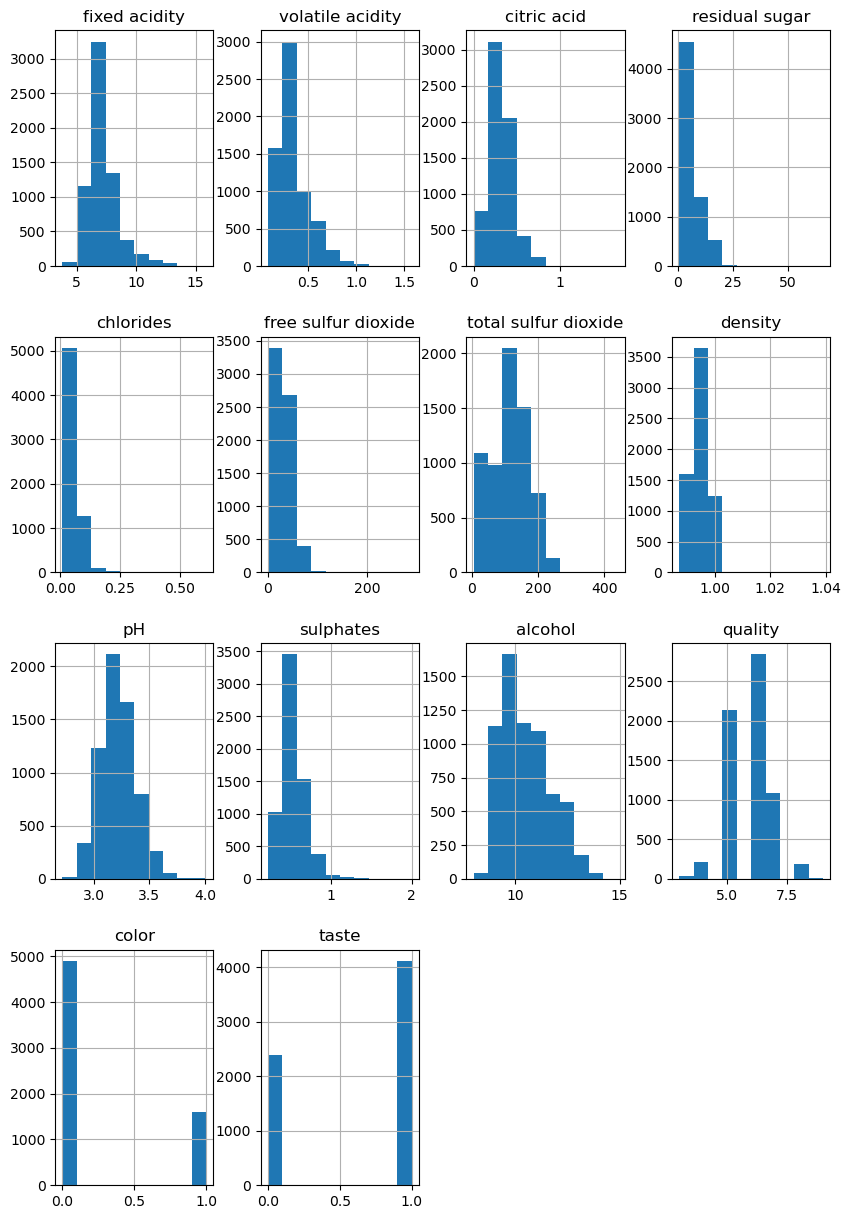

In [4]:
#모든 컬럼의 히스토그램 조사

import matplotlib.pyplot as plt

wine.hist(bins=10,figsize=(10,15))

In [5]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste'],
      dtype='object')

In [6]:
col_name = ['fixed acidity','volatile acidity','citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df_pivot_table = wine.pivot_table(col_name,['quality'],aggfunc='median')
df_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,10.15,0.0550,0.33,0.995900,7.45,17.0,3.245,3.15,0.505,102.5,0.415
4,10.00,0.0505,0.26,0.994995,7.00,15.0,3.220,2.20,0.485,102.0,0.380
5,9.60,0.0530,0.30,0.996100,7.10,27.0,3.190,3.00,0.500,127.0,0.330
6,10.50,0.0460,0.31,0.994700,6.90,29.0,3.210,3.10,0.510,117.0,0.270
7,11.40,0.0390,0.32,0.992400,6.90,30.0,3.220,2.80,0.520,114.0,0.270
8,12.00,0.0370,0.32,0.991890,6.80,34.0,3.230,4.10,0.480,118.0,0.280
9,12.50,0.0310,0.36,0.990300,7.10,28.0,3.280,2.20,0.460,119.0,0.270


In [8]:
corr_matrix = wine.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.067354
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.267046
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.075739
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,-0.032484
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.181908
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.044819
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,-0.047585
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.268876
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,0.018842
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,0.035807


In [9]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

<Axes: xlabel='taste', ylabel='count'>

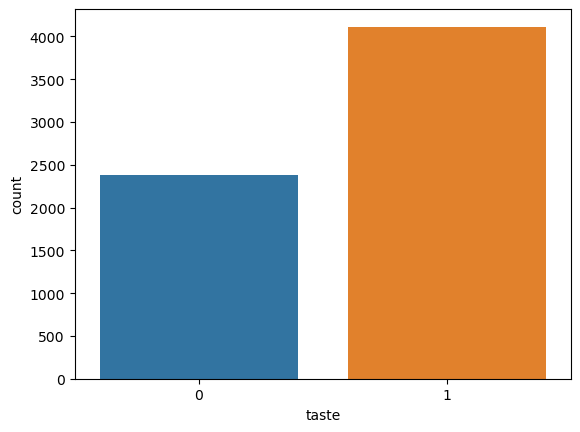

In [12]:
import seaborn as sns

sns.countplot(data=wine,x='taste')

### 다양한 모델을 한번에 테스트 해보자!

In [13]:
from sklearn.ensemble import (AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))
models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('LogisticRegression',LogisticRegression()))


In [14]:
models

[('RandomForestClassifier', RandomForestClassifier()),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('GradientBoostingClassifier', GradientBoostingClassifier()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('LogisticRegression', LogisticRegression())]

In [15]:
#모델별로 kfold해서 훈련시키고 결과 출력

from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_result = cross_val_score(model, X_train,y_train,cv=kfold, scoring='accuracy')

    results.append(cv_result)
    names.append(name)

    print(name,cv_result.mean(),cv_result.std())

RandomForestClassifier 0.8187358406752054 0.01648242484125679
AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifier 0.7663959428444511 0.021596556352125432
DecisionTreeClassifier 0.7531256015399421 0.007702308870108315
LogisticRegression 0.74273191678389 0.015548839626296565


[Text(1, 0, 'RandomForestClassifier'),
 Text(2, 0, 'AdaBoostClassifier'),
 Text(3, 0, 'GradientBoostingClassifier'),
 Text(4, 0, 'DecisionTreeClassifier'),
 Text(5, 0, 'LogisticRegression')]

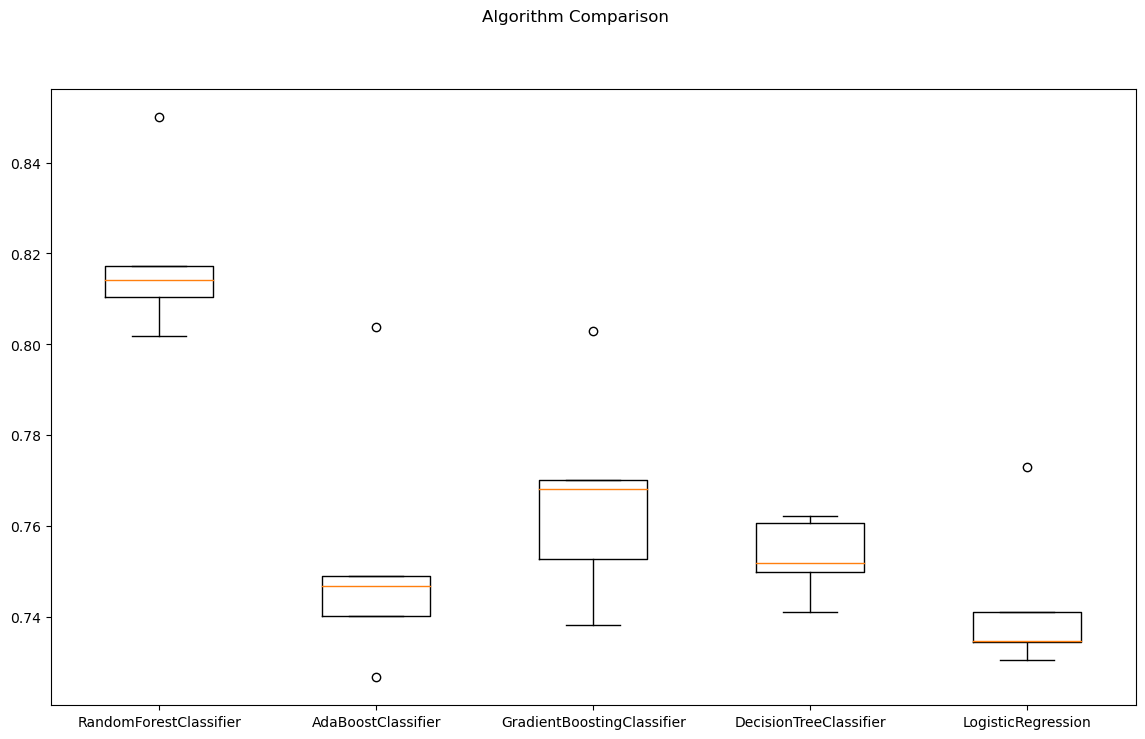

In [17]:
#cross_validation 결과를 시각화
fig = plt.figure(figsize=(14,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [18]:
#테스트 데이터에 대한 평과 결과

from sklearn.metrics import accuracy_score

for name,model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))


RandomForestClassifier 0.8369230769230769
AdaBoostClassifier 0.7553846153846154
GradientBoostingClassifier 0.7884615384615384
DecisionTreeClassifier 0.7807692307692308
LogisticRegression 0.7469230769230769
